In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading historical data

df = pd.read_csv("Historical_Load_Data.csv")
df

,date,load_units,people_required,people_available,overtime
0,01-04-2025,10,10,7,True
1,02-04-2025,11,11,7,True
2,03-04-2025,9,9,7,True
3,04-04-2025,11,11,6,True
4,05-04-2025,3,3,7,False
...,...,...,...,...,...
86,26-06-2025,10,10,7,True
87,27-06-2025,12,12,6,True
88,28-06-2025,5,5,7,False
89,29-06-2025,6,6,7,False


In [3]:
staffs = pd.read_csv("Staff_List_with_Holidays.csv")
staffs

,employee_id,name,holidays
0,1,Alice,"2025-07-01,2025-06-16,2025-05-21,2025-05-08"
1,2,Bob,"2025-07-16, 2025-05-12,2025-05-06,2025-05-20"
2,3,Carol,"2025-07-07, 2025-06-07,2025-06-06,2025-06-27"
3,4,Dave,"2025-07-11,2025-04-29,2025-05-10,2025-05-11"
4,5,Eve,"2025-05-26,2025-06-02,2025-06-21,2025-08-11"
5,6,Frank,"2025-05-20,2025-06-13,2025-06-22"
6,7,Grace,"2025-04-22,2025-04-04,2025-06-08"


## Exploring dataframes

In [4]:
# Let's check the data types of df dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              91 non-null     object
 1   load_units        91 non-null     int64 
 2   people_required   91 non-null     int64 
 3   people_available  91 non-null     int64 
 4   overtime          91 non-null     bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 3.1+ KB


"date" is of the type object, but it clearly is of datetime type. Now we will convert it into datetime type.

In [5]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
df.info(), df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              91 non-null     datetime64[ns]
 1   load_units        91 non-null     int64         
 2   people_required   91 non-null     int64         
 3   people_available  91 non-null     int64         
 4   overtime          91 non-null     bool          
dtypes: bool(1), datetime64[ns](1), int64(3)
memory usage: 3.1 KB


(None,
         date  load_units  people_required  people_available  overtime
 0 2025-04-01          10               10                 7      True
 1 2025-04-02          11               11                 7      True)

In [6]:
staffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  7 non-null      int64 
 1   name         7 non-null      object
 2   holidays     7 non-null      object
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


Now let's look at different columns of the df

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,91,2025-05-16 00:00:00,2025-04-01 00:00:00,2025-04-23 12:00:00,2025-05-16 00:00:00,2025-06-07 12:00:00,2025-06-30 00:00:00,NaN
load_units,91.0,8.098901,3.0,6.0,8.0,10.0,12.0,2.645982
people_required,91.0,8.098901,3.0,6.0,8.0,10.0,12.0,2.645982
people_available,91.0,6.769231,5.0,7.0,7.0,7.0,7.0,0.449121


**Observation**:

- **date** is from 1st april 2025 to 30th June 2025 
- **load_units** and **people_required** column ranges from 3 to 12
- **people available** is from 5 to 7

### Let's check date column

In [8]:
# Checking the number of unique dates

len(df.date.unique()), df.date.min(), df.date.max()

(91, Timestamp('2025-04-01 00:00:00'), Timestamp('2025-06-30 00:00:00'))

We have 91 rows and 91 unique dates. This means we have one row for each date. Let's cross check this.?

In [9]:
# Checking the number of days between the dates in our data

len(pd.date_range(start=df.date.min(), end=df.date.max(), freq='D'))

91

In [10]:
# Let's check if these dates matches

len(set(pd.date_range(start=df.date.min(), end=df.date.max(), freq='D')).intersection(df.date.unique()))

91

So, all my date are unique and is continuous from april-01 to june-30

### load_units column

In [11]:
df.load_units.value_counts()

load_units
10    17
8     14
4     11
11    10
9      9
12     8
7      7
5      6
6      6
3      3
Name: count, dtype: int64

So, 10 load units is having maximum frequency, and 3 having lowest

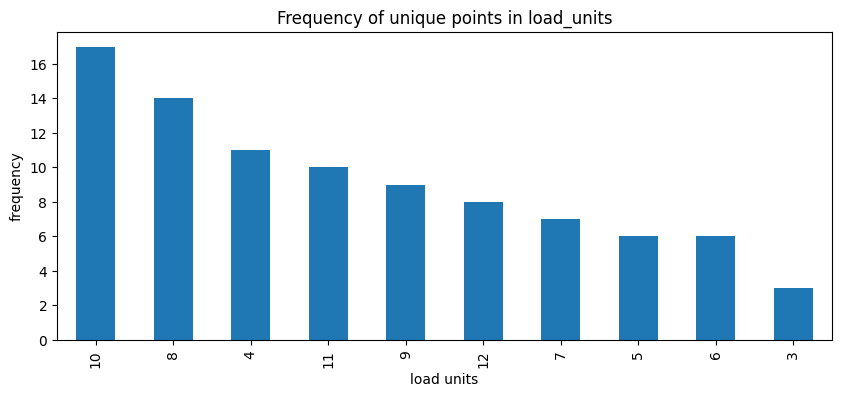

In [12]:
# Plotting the frequency of load_units

plt.figure(figsize=(10, 4))
df.load_units.value_counts().plot(kind='bar')
plt.title("Frequency of unique points in load_units")
plt.xlabel("load units")
plt.ylabel("frequency")

plt.show()

In [13]:
df

,date,load_units,people_required,people_available,overtime
0,2025-04-01,10,10,7,True
1,2025-04-02,11,11,7,True
2,2025-04-03,9,9,7,True
3,2025-04-04,11,11,6,True
4,2025-04-05,3,3,7,False
...,...,...,...,...,...
86,2025-06-26,10,10,7,True
87,2025-06-27,12,12,6,True
88,2025-06-28,5,5,7,False
89,2025-06-29,6,6,7,False


We can see that load_units is equal to people_required. Let's check what does it mean here.

In [14]:
# Checking the rows where load_units is equal to people required

len(df.loc[df.load_units == df.people_required])

91

So, both load_units and people_required are same. Means removing one won't affect anything here.

#### Let's remove load_units column

In [15]:
df.drop(columns=['load_units'], inplace=True)

df

,date,people_required,people_available,overtime
0,2025-04-01,10,7,True
1,2025-04-02,11,7,True
2,2025-04-03,9,7,True
3,2025-04-04,11,6,True
4,2025-04-05,3,7,False
...,...,...,...,...
86,2025-06-26,10,7,True
87,2025-06-27,12,6,True
88,2025-06-28,5,7,False
89,2025-06-29,6,7,False


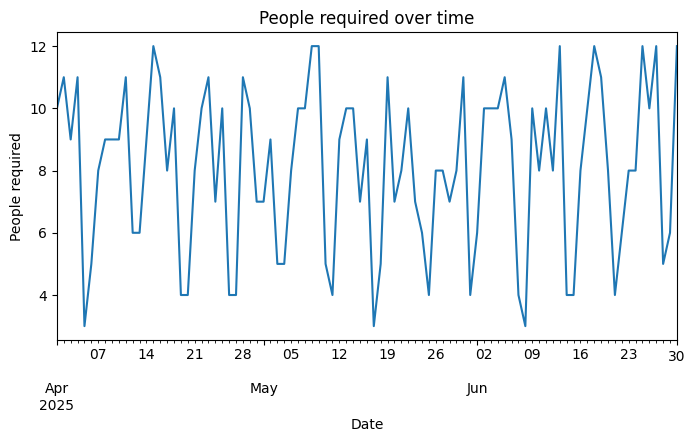

In [16]:
# Plotting people required w.r.t dates

plt.figure(figsize=(8, 4))
df.set_index('date').people_required.plot(kind='line')

plt.title("People required over time")
plt.xlabel("Date")
plt.ylabel("People required")
plt.show()

So, some kind of seasonality can be seen here.

#### Let's check seasonality

In [17]:
indexes_6 = df.loc[df.people_required<=6].index
indexes_6

Index([ 4,  5, 11, 12, 18, 19, 25, 26, 32, 33, 39, 40, 46, 47, 53, 54, 60, 61,
       67, 68, 74, 75, 81, 82, 88, 89],
      dtype='int64')

In [18]:
differences = []

for i, val in enumerate(indexes_6):
    if i>0:
        differences.append(indexes_6[i] - indexes_6[i-1])
    else:
        indexes_6[i]

differences

[1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1, 6, 1]

## Clearly this column is seasonal with seasonality of 6

### We can also see that overtime is True when people required > people available. Let's verify it

In [19]:
# Making a dataframe where people_required > people_available

df_true = df.loc[df.people_required > df.people_available]
df_true.reset_index(drop=True, inplace=True)

df_true.head()

,date,people_required,people_available,overtime
0,2025-04-01,10,7,True
1,2025-04-02,11,7,True
2,2025-04-03,9,7,True
3,2025-04-04,11,6,True
4,2025-04-07,8,7,True


In [20]:
# Checking the counts of overtime in df_true. It is expected to be all True

df_true.overtime.value_counts()

overtime
True     58
False     1
Name: count, dtype: int64

#### One of overtime value is False which shouldn't be the case. Let's see this outlier value.

In [21]:
df_true.loc[df_true.overtime == False]

,date,people_required,people_available,overtime
31,2025-05-20,7,5,False


Clearly people_required > people_available, but overtime is marked False. It is clearly an **outlier** in the data.

#### Now let's check points where people_required <= people_available

In [22]:
# Making a dataframe where people_required <= people_available

df_false = df.loc[df.people_required <= df.people_available]
df_false.reset_index(drop=True, inplace=True)

df_false.head()

,date,people_required,people_available,overtime
0,2025-04-05,3,7,False
1,2025-04-06,5,7,False
2,2025-04-12,6,7,False
3,2025-04-13,6,7,False
4,2025-04-19,4,7,False


In [23]:
# Checking the counts of overtime in df_fasle. It is expected to be all False

df_false.overtime.value_counts()

overtime
False    32
Name: count, dtype: int64

So, all values in overtime where people_required <= people_available are correctly marked

## Checking the people available column

In [24]:
# Counting the frequency

df.people_available.value_counts()

people_available
7    71
6    19
5     1
Name: count, dtype: int64

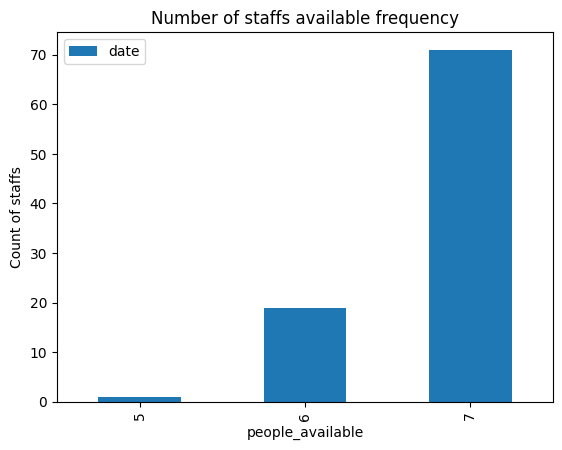

In [25]:
pd.DataFrame(df.groupby(['people_available']).date.count()).plot(kind='bar')
plt.title("Number of staffs available frequency")
plt.ylabel("Count of staffs")
plt.show()

Observation:

- 7 people are available for most of the days
- 5 people are available on 1 day, and 6 on the others

### Let's check total number of staffs from staffs df

In [26]:
staffs.employee_id.unique()

array([1, 2, 3, 4, 5, 6, 7])

So, we have 7 staffs in total and all are available at most of the days. Only once 2 of them are on leave.

In [27]:
# Check the date when 2 of them are in leave.

df.loc[df.people_available == 5]

,date,people_required,people_available,overtime
49,2025-05-20,7,5,False


On 20th May 2025, 2 people are on leave.

[]

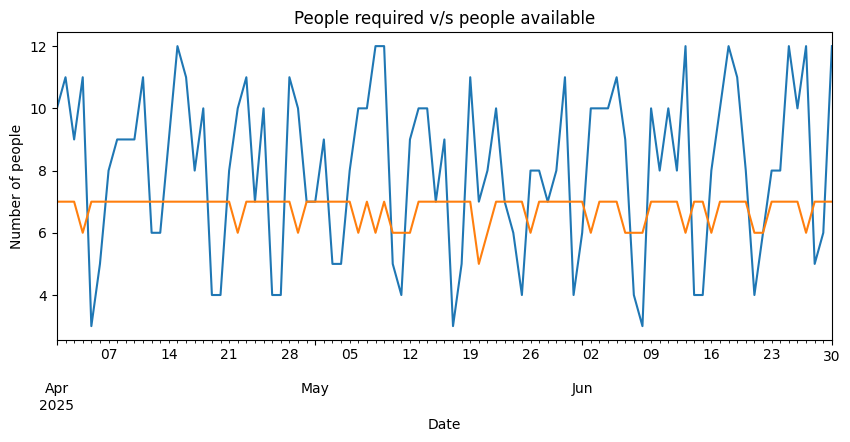

In [28]:
# Plotting requirement v/s availability

plt.figure(figsize=(10, 4))
df.set_index('date').people_required.plot(kind='line')
df.set_index('date').people_available.plot(kind='line')

plt.title("People required v/s people available")
plt.xlabel("Date")
plt.ylabel("Number of people")
plt.plot()

[]

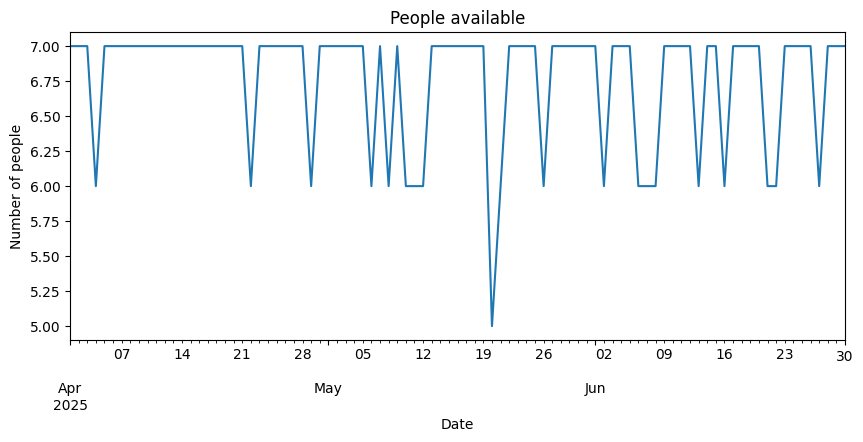

In [29]:
# Plotting people avaialble

plt.figure(figsize=(10, 4))
df.set_index('date').people_available.plot(kind='line')

plt.title("People available")
plt.xlabel("Date")
plt.ylabel("Number of people")
plt.plot()

So, as seen only 5 people were available on May 20th

Also, there is no trend or seasonality observed here, like people_required column

#### Let's look at overtime column

In [30]:
# Checking overtime column

df.overtime.value_counts()

overtime
True     58
False    33
Name: count, dtype: int64

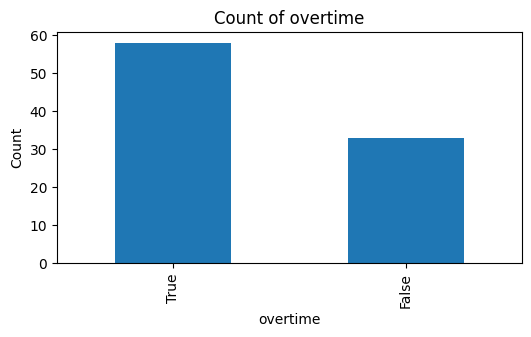

In [31]:
# Plotting overtime

plt.figure(figsize=(6, 3))
df.overtime.value_counts().plot(kind='bar')

plt.title("Count of overtime")
plt.ylabel("Count")
plt.show()

### Now, let's look at the relationship between people_required, people_available and overtime

When people required are >=8, 6 or 7 staffs are available at max

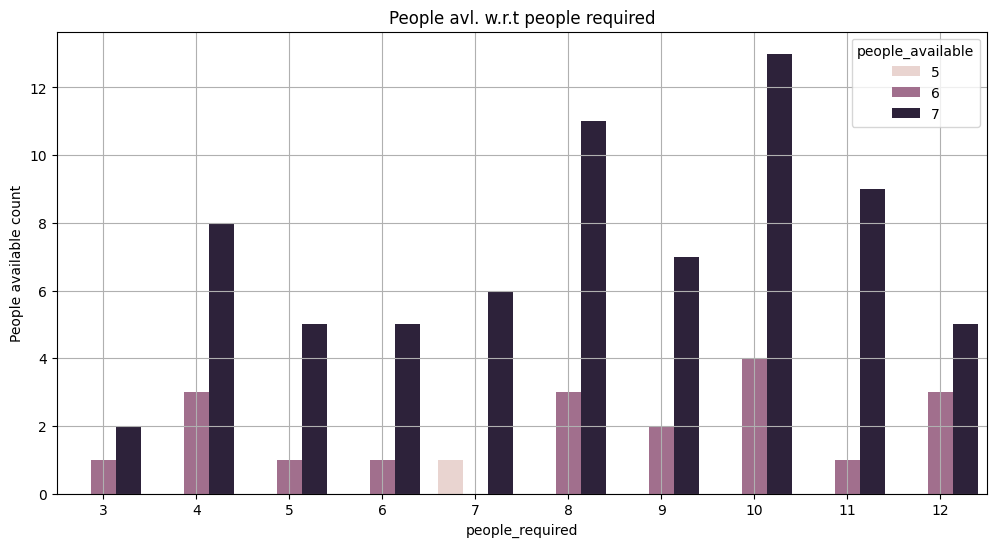

In [32]:
# Plotting availability vs requirement

dn = pd.DataFrame(df.groupby(['people_required', 'people_available'])['date'].count()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=dn, x='people_required', y='date', hue='people_available')
plt.title("People avl. w.r.t people required")
plt.ylabel("People available count")

plt.grid('on')
plt.show()

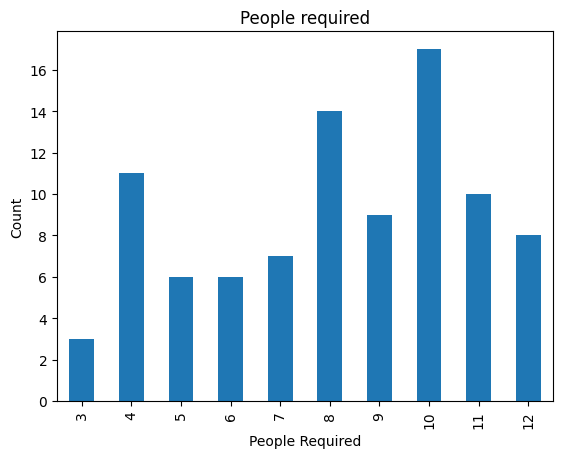

In [33]:
# People required frequency

df.groupby(['people_required']).date.count().plot(kind='bar')
plt.title("People required")
plt.xlabel("People Required")
plt.ylabel("Count")

plt.show()

Wherever requirement is greater than 7, it is always overtime since number of employees are not met.

#### Now let's check what number of people are available w.r.t overtime

In [34]:
# Making a dataframe for plotting overtime v/s people available

dx = pd.DataFrame(df.groupby(['people_available', 'overtime']).date.count()).reset_index()

dx

,people_available,overtime,date
0,5,False,1
1,6,False,6
2,6,True,13
3,7,False,26
4,7,True,45


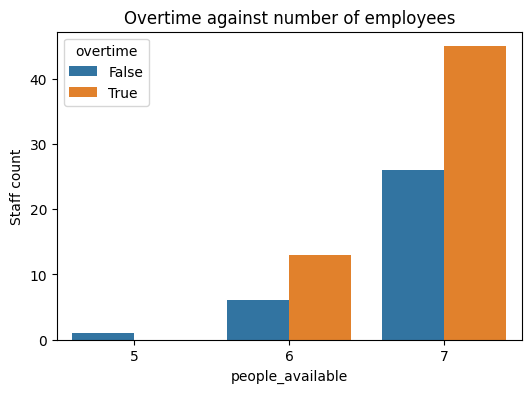

In [35]:
# Plotting people available v/s overtime

plt.figure(figsize=(6, 4))
sns.barplot(data=dx, x='people_available', y='date', hue='overtime')

plt.title("Overtime against number of employees")
plt.ylabel("Staff count")

plt.show()

We can see that most of the employees do Overtime (even if they are working with as a whole)

### Let's see how many times do we reached overtime w.r.t people required

In [36]:
# Making a dataframe for plotting overtime v/s people required


overtime_df = pd.DataFrame(df.groupby(['people_required', 'overtime']).date.count()).reset_index()
overtime_df

,people_required,overtime,date
0,3,False,3
1,4,False,11
2,5,False,6
3,6,False,6
4,7,False,7
5,8,True,14
6,9,True,9
7,10,True,17
8,11,True,10
9,12,True,8


#### According to this, there is no overtime if people required are <=7. Let's check

In [37]:
# Checking number of days of overtime if people required is <=7 

df.loc[df.people_required.isin([3, 4, 5, 6, 7])].overtime.value_counts()

overtime
False    33
Name: count, dtype: int64

### So, there is no overtime when people required is <=7

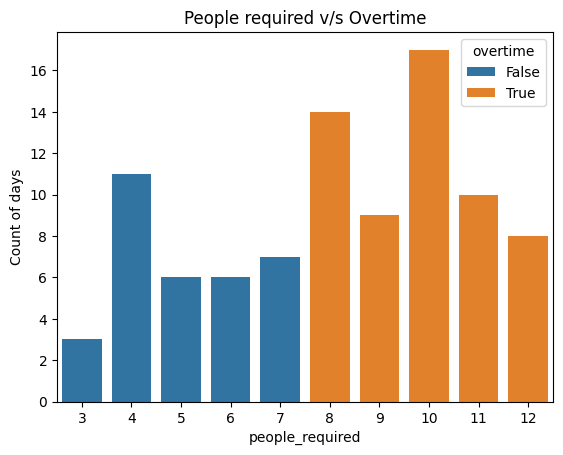

In [38]:
# Plotting people required v/s overtime

sns.barplot(data=overtime_df, x='people_required', y='date', hue='overtime')
plt.title("People required v/s Overtime")

plt.ylabel("Count of days")

plt.show()

## Analysing staffs df

In [39]:
staffs

,employee_id,name,holidays
0,1,Alice,"2025-07-01,2025-06-16,2025-05-21,2025-05-08"
1,2,Bob,"2025-07-16, 2025-05-12,2025-05-06,2025-05-20"
2,3,Carol,"2025-07-07, 2025-06-07,2025-06-06,2025-06-27"
3,4,Dave,"2025-07-11,2025-04-29,2025-05-10,2025-05-11"
4,5,Eve,"2025-05-26,2025-06-02,2025-06-21,2025-08-11"
5,6,Frank,"2025-05-20,2025-06-13,2025-06-22"
6,7,Grace,"2025-04-22,2025-04-04,2025-06-08"


In [40]:
# finding the total number of staffs

total_staffs = len(staffs.employee_id.unique())
total_staffs

7

### Let's check the dates when they are on holiday

In [41]:
employees = staffs.set_index('name').drop(columns=['employee_id']).to_dict()['holidays']
employees

{'Alice': '2025-07-01,2025-06-16,2025-05-21,2025-05-08',
 'Bob': '2025-07-16, 2025-05-12,2025-05-06,2025-05-20',
 'Carol': '2025-07-07, 2025-06-07,2025-06-06,2025-06-27',
 'Dave': '2025-07-11,2025-04-29,2025-05-10,2025-05-11',
 'Eve': '2025-05-26,2025-06-02,2025-06-21,2025-08-11',
 'Frank': '2025-05-20,2025-06-13,2025-06-22',
 'Grace': '2025-04-22,2025-04-04,2025-06-08'}

In [42]:
for k, v in employees.items():
    employees[k] = v.split(",")

employees

{'Alice': ['2025-07-01', '2025-06-16', '2025-05-21', '2025-05-08'],
 'Bob': ['2025-07-16', ' 2025-05-12', '2025-05-06', '2025-05-20'],
 'Carol': ['2025-07-07', ' 2025-06-07', '2025-06-06', '2025-06-27'],
 'Dave': ['2025-07-11', '2025-04-29', '2025-05-10', '2025-05-11'],
 'Eve': ['2025-05-26', '2025-06-02', '2025-06-21', '2025-08-11'],
 'Frank': ['2025-05-20', '2025-06-13', '2025-06-22'],
 'Grace': ['2025-04-22', '2025-04-04', '2025-06-08']}

In [43]:
holidays = [v for v in employees.values()]
holidays = [i.strip() for j in holidays for i in j]
holidays = sorted(holidays)

holidays

['2025-04-04',
 '2025-04-22',
 '2025-04-29',
 '2025-05-06',
 '2025-05-08',
 '2025-05-10',
 '2025-05-11',
 '2025-05-12',
 '2025-05-20',
 '2025-05-20',
 '2025-05-21',
 '2025-05-26',
 '2025-06-02',
 '2025-06-06',
 '2025-06-07',
 '2025-06-08',
 '2025-06-13',
 '2025-06-16',
 '2025-06-21',
 '2025-06-22',
 '2025-06-27',
 '2025-07-01',
 '2025-07-07',
 '2025-07-11',
 '2025-07-16',
 '2025-08-11']

In [44]:
# Now let's check dates and freuency of absentee in the dates to check if it matches our historical data person available

holiday_freq = {}
for dt in set(holidays):
    holiday_freq[dt] = holidays.count(dt)

holiday_freq = pd.DataFrame({'freq': holiday_freq})
holiday_freq.reset_index(inplace=True)
holiday_freq.rename(columns={'index': 'date'}, inplace=True)
holiday_freq.sort_values(by=['date'], ascending=True, inplace=True)
holiday_freq.reset_index(drop=True, inplace=True)

holiday_freq

,date,freq
0,2025-04-04,1
1,2025-04-22,1
2,2025-04-29,1
3,2025-05-06,1
4,2025-05-08,1
5,2025-05-10,1
6,2025-05-11,1
7,2025-05-12,1
8,2025-05-20,2
9,2025-05-21,1


### Now let's check holidays against the historical people available

In [45]:
# Filtering out data where all people were not available to match with the holidays data in the staffs data

not_all_avl = df.loc[df.people_available<7].reset_index(drop=True)
not_all_avl['holiday'] = not_all_avl.people_available.apply(lambda x: 7-x)
not_all_avl.drop(columns=['people_required', 'overtime', 'people_available'], inplace=True)

not_all_avl

,date,holiday
0,2025-04-04,1
1,2025-04-22,1
2,2025-04-29,1
3,2025-05-06,1
4,2025-05-08,1
5,2025-05-10,1
6,2025-05-11,1
7,2025-05-12,1
8,2025-05-20,2
9,2025-05-21,1


In [46]:
# let's match the holidays count in historical data with frequency of holidays given in staff data

hfreq = pd.concat([not_all_avl, holiday_freq['freq']], axis=1, join='inner')
hfreq

,date,holiday,freq
0,2025-04-04,1,1
1,2025-04-22,1,1
2,2025-04-29,1,1
3,2025-05-06,1,1
4,2025-05-08,1,1
5,2025-05-10,1,1
6,2025-05-11,1,1
7,2025-05-12,1,1
8,2025-05-20,2,2
9,2025-05-21,1,1


In [47]:
# Checking for rows where holiday dates does not matches

hfreq.loc[hfreq.holiday != hfreq.freq]

,date,holiday,freq


## Hence there is a relationship in both the data tables given. Holidays in staffs impacts the people available count in the historical data.